In [15]:
import numpy as np
import matplotlib.pyplot as plt

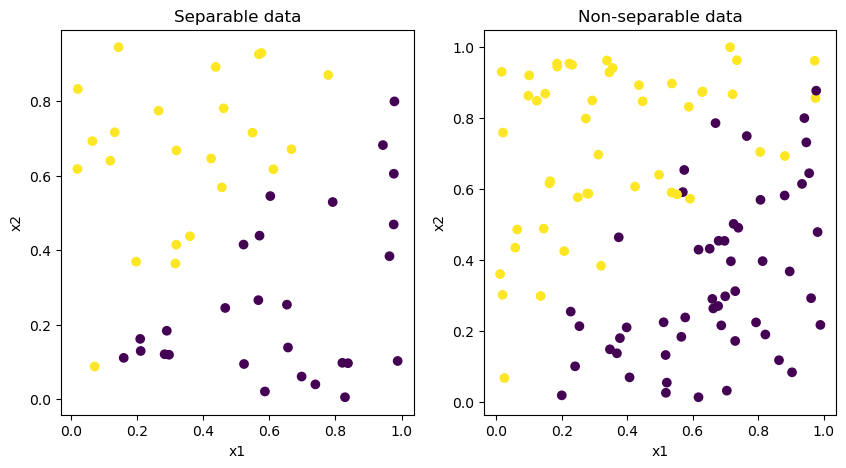

In [16]:
# 2. Classification with a Linear Function (Perceptron)

## 2.1 Data Generation (Similar to Fig. 18.15)

# Separable Data (Fig. 18.15a)
np.random.seed(0)
X_separable = np.random.rand(50, 2)  # 2 features
y_separable = np.array([1 if x[1] > x[0] else 0 for x in X_separable])


# Non-separable Data (Fig. 18.15b - add some overlap)

X_nonseparable = np.random.rand(100, 2) 
y_nonseparable = np.array([1 if x[1] > x[0] + np.random.uniform(-0.2, 0.2) else 0 for x in X_nonseparable])



# Plotting the separable and non separable data

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(X_separable[:, 0], X_separable[:, 1], c=y_separable, cmap='viridis', label='Data points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Separable data')



plt.subplot(1, 2, 2)
plt.scatter(X_nonseparable[:, 0], X_nonseparable[:, 1], c=y_nonseparable, cmap='viridis', label='Data points')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Non-separable data')
plt.show()

In [17]:
## 2.2 Perceptron Algorithm

def perceptron(X, y, learning_rate, n_iterations):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term (x0 = 1)
    w = np.zeros(X.shape[1])
    accuracy_history = []

    for _ in range(n_iterations):
        n_correct = 0
        for i in range(len(X)):  # Loop through examples one at a time
            y_hat = 1 if np.dot(w, X[i]) >= 0 else 0
            w = w + learning_rate * (y[i] - y_hat) * X[i]  # Perceptron learning rule

            if y_hat==y[i]:
                n_correct += 1

        accuracy = n_correct / len(X)
        accuracy_history.append(accuracy)


    return w, accuracy_history

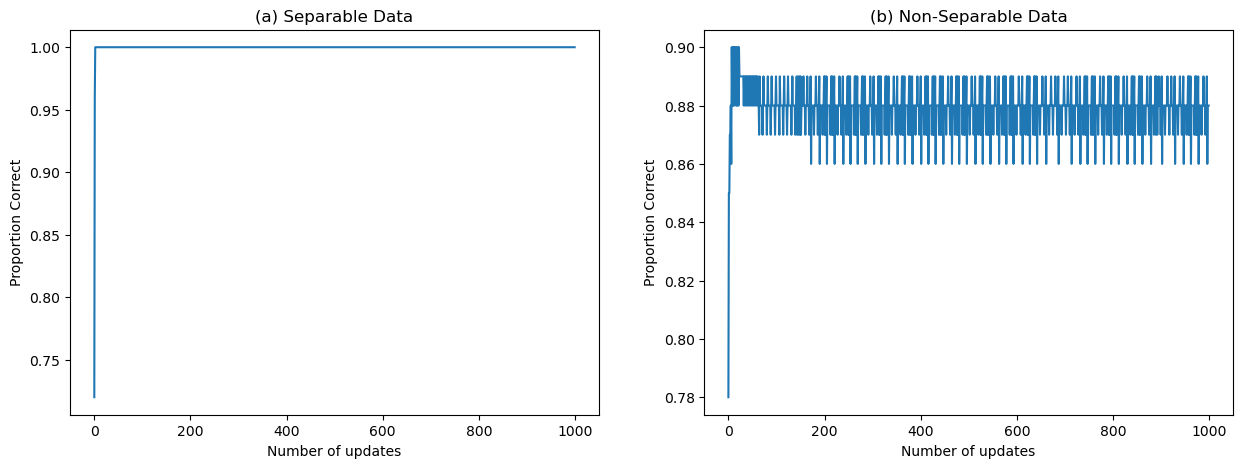

In [18]:
## 2.3 Training and Visualization (Fig. 18.16)


learning_rate = 0.1
n_iterations = 1000


# Train on Separable data
w_separable, accuracy_history_separable = perceptron(X_separable, y_separable, learning_rate, n_iterations)

# Train on Non separable data
w_nonseparable, accuracy_history_nonseparable = perceptron(X_nonseparable, y_nonseparable, learning_rate, n_iterations)





# Plot Fig. 18.16 (a), (b)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy_history_separable)
plt.xlabel('Number of updates')
plt.ylabel('Proportion Correct')
plt.title('(a) Separable Data')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history_nonseparable)
plt.xlabel('Number of updates')
plt.ylabel('Proportion Correct')
plt.title('(b) Non-Separable Data')

plt.show()

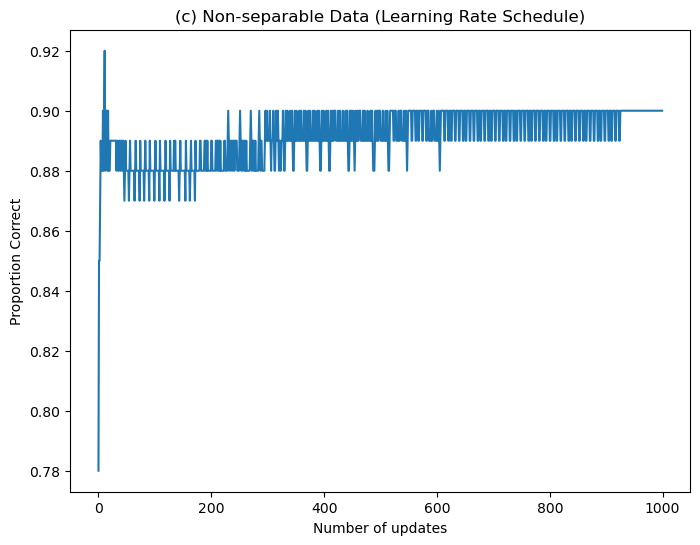

In [19]:
## 2.4 Learning Rate Schedule (Fig. 18.16c)

def perceptron_with_schedule(X, y, initial_learning_rate, n_iterations):
    X = np.insert(X, 0, 1, axis=1)
    w = np.zeros(X.shape[1])
    accuracy_history = []

    for t in range(n_iterations):
        n_correct = 0
        learning_rate = initial_learning_rate / (initial_learning_rate + t) # Learning rate schedule

        for i in range(len(X)):

            y_hat = 1 if np.dot(w, X[i]) >= 0 else 0
            w = w + learning_rate * (y[i] - y_hat) * X[i]

            if y_hat==y[i]:
                n_correct += 1
        accuracy = n_correct/len(X)

        accuracy_history.append(accuracy)

    return w, accuracy_history

# Train with learning rate schedule
initial_learning_rate = 1000
w_schedule, accuracy_history_schedule = perceptron_with_schedule(X_nonseparable, y_nonseparable, initial_learning_rate, n_iterations)



# Plot Fig. 18.16 (c)
plt.figure(figsize=(8,6))
plt.plot(accuracy_history_schedule)
plt.xlabel("Number of updates")
plt.ylabel("Proportion Correct")
plt.title("(c) Non-separable Data (Learning Rate Schedule)")
plt.show()

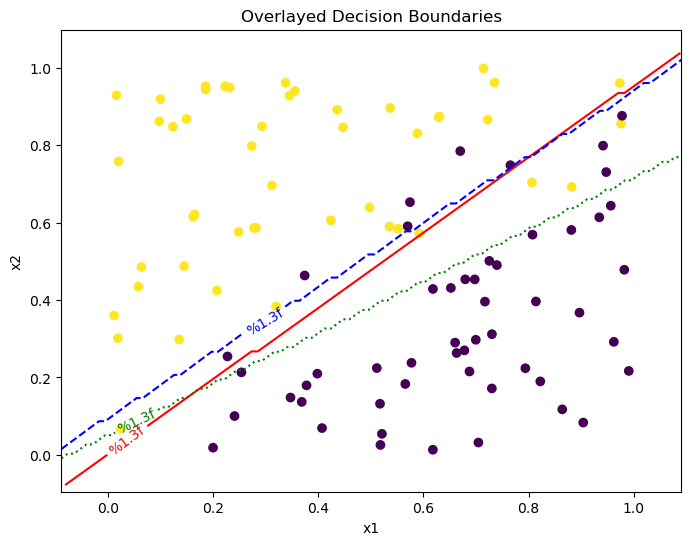

In [24]:
def plot_overlayed_decision_boundaries(X_separable, y_separable, w_separable, X_nonseparable, y_nonseparable, w_nonseparable, w_schedule):
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    datasets = [(X_separable, w_separable, 'red', 'solid', "Separable"),
                (X_nonseparable, w_nonseparable, 'blue', 'dashed', "Non-Separable"),
                (X_nonseparable, w_schedule, 'green', 'dotted', "Non-Sep. (Sched.)")]

    ax.scatter(X_nonseparable[:, 0], X_nonseparable[:, 1], c=y_nonseparable, cmap='viridis')

    for X, w, color, linestyle, label in datasets:
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)) # Re-added these lines!
        X_grid = np.c_[xx.ravel(), yy.ravel()]
        X_grid_with_bias = np.insert(X_grid, 0, 1, axis=1)
        Z = np.dot(X_grid_with_bias, w) >= 0  # Re-added this line!
        Z = Z.reshape(xx.shape)             # Re-added this line!

        CS = ax.contour(xx, yy, Z, colors=[color], linestyles=[linestyle])
        ax.clabel(CS, inline=1, fontsize=10, fmt={1.0: label})

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Overlayed Decision Boundaries')

    plt.show()


# ... After you've trained your perceptrons (w_separable, w_nonseparable, w_schedule):
plot_overlayed_decision_boundaries(X_separable, y_separable, w_separable, X_nonseparable, y_nonseparable, w_nonseparable, w_schedule)

<IPython.core.display.Javascript object>


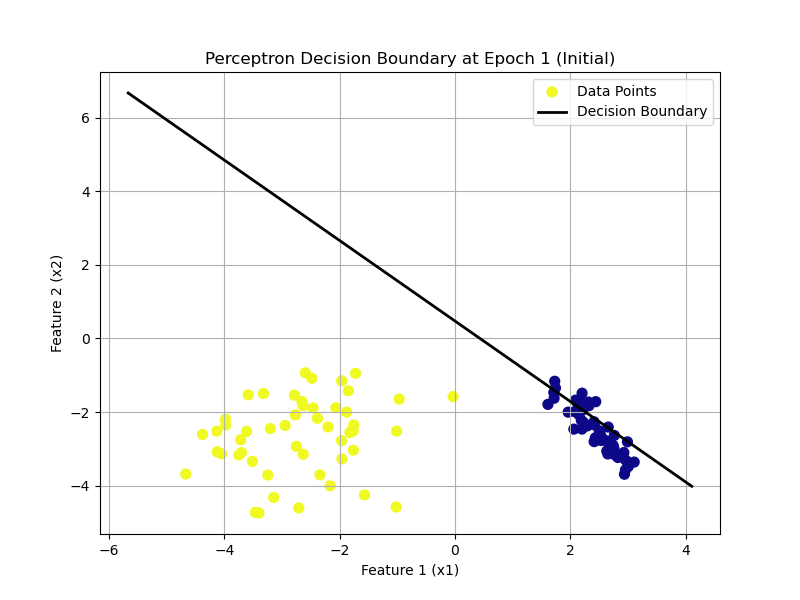

<IPython.core.display.Javascript object>


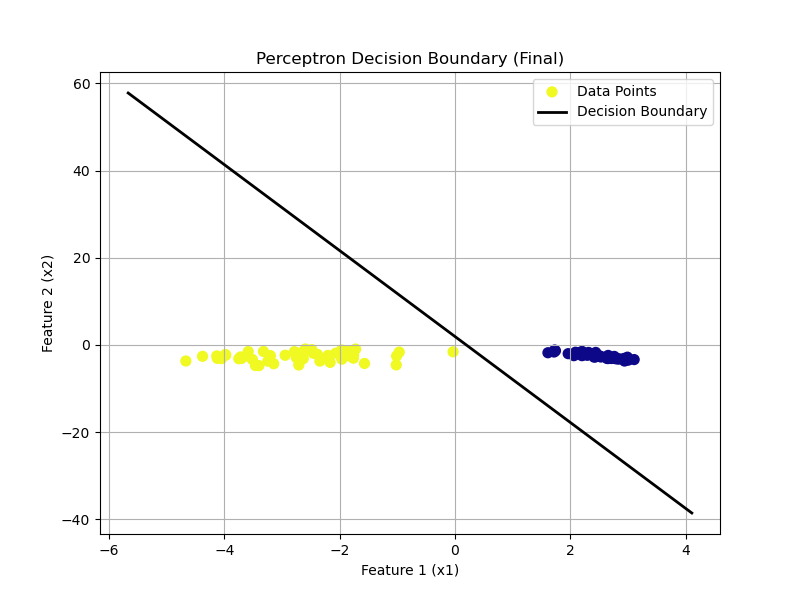

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import matplotlib.animation as animation # Import for animations


# Activation function 
def step_function(z):
    return 1 if z >= 0 else 0  # Nice and clean

# Perceptron training with accuracy tracking 
def perceptron_train(X, y, learning_rate=0.05, epochs=100):  
    num_features = X.shape[1]
    weights = np.random.rand(num_features) * 0.01 # Initialize with small random values
    bias = 0  # Initialize bias to zero.
    accuracy_over_time = []
    weight_history = [] # to track weight changes over time



    for epoch in range(epochs):
        num_correct = 0
        for i in range(len(X)):
            # Forward pass: Calculate weighted sum and activation
            weighted_sum = np.dot(X[i], weights) + bias
            prediction = step_function(weighted_sum)
            
            # Update the weights and bias based on the error and add to the history
            error = y[i] - prediction
            weights += learning_rate * error * X[i] 
            weight_history.append(weights.copy()) # Append after updating
            bias += learning_rate * error

            if prediction == y[i]:
                num_correct += 1
        
        accuracy = num_correct / len(y)
        accuracy_over_time.append(accuracy)

    return weights, bias, accuracy_over_time, np.array(weight_history)



# --- Generate a different linearly separable dataset ---
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                            n_clusters_per_class=1, flip_y=0, random_state=10, class_sep=2.5)  

# Train the perceptron
weights, bias, accuracy_history, weight_history = perceptron_train(X, y)


# --- Plotting the Decision Boundary (initial, final, animated) ---
def plot_decision_boundary(X, y, weights, bias, epoch=None, title_extra=""):  # Added epoch to title
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', marker='o', s=50, label="Data Points") # Changed colors and markers

    x_vals = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])  # Just use min/max of x for line
    y_vals = -(weights[0] / weights[1]) * x_vals - (bias / weights[1]) 
    plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Decision Boundary')

    plt.xlabel('Feature 1 (x1)')
    plt.ylabel('Feature 2 (x2)')
    title = "Perceptron Decision Boundary"

    if epoch is not None:
        title += f" at Epoch {epoch+1}"  # Shows epoch number
    if title_extra:
      title += " " + title_extra
    
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()



# Plot initial and final boundary
plot_decision_boundary(X, y, weight_history[0], bias, epoch=0, title_extra="(Initial)")
plot_decision_boundary(X, y, weights, bias, title_extra="(Final)")

<IPython.core.display.Javascript object>


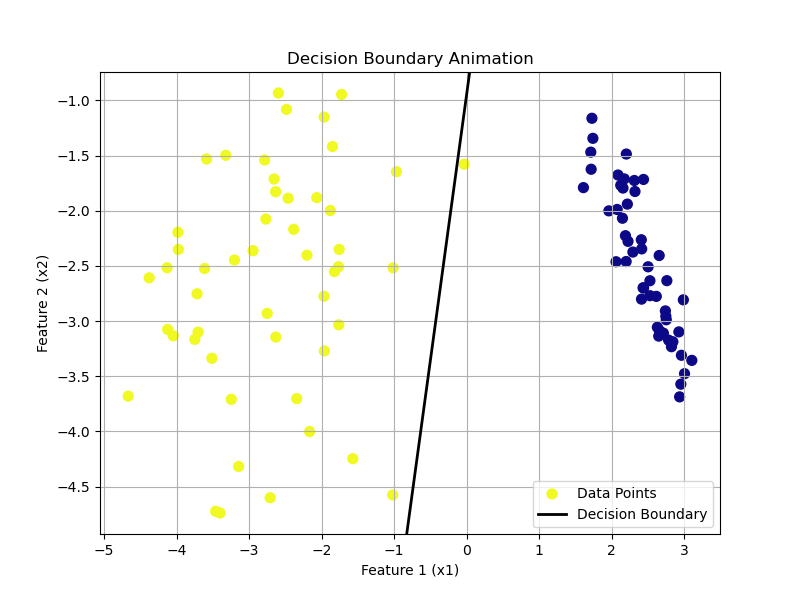

In [3]:
# --- Animation ---
fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma', marker='o', s=50, label="Data Points")  # Scatter stays constant
line, = ax.plot([], [], 'k-', linewidth=2, label='Decision Boundary')  # Line is animated
ax.set_xlabel('Feature 1 (x1)')
ax.set_ylabel('Feature 2 (x2)')
ax.set_title("Decision Boundary Animation")
ax.legend()
ax.grid(True)


x_vals = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])

def animate_boundary(i):
    intermediate_weights = weight_history[i]
    y_vals = -(intermediate_weights[0] / intermediate_weights[1]) * x_vals - (bias / intermediate_weights[1]) # Calculate boundary for current weights
    line.set_data(x_vals, y_vals)
    return line,

ani = animation.FuncAnimation(fig, animate_boundary, frames=len(accuracy_history), blit=True, interval=200, repeat=True)  # Adjust interval as needed

<IPython.core.display.Javascript object>


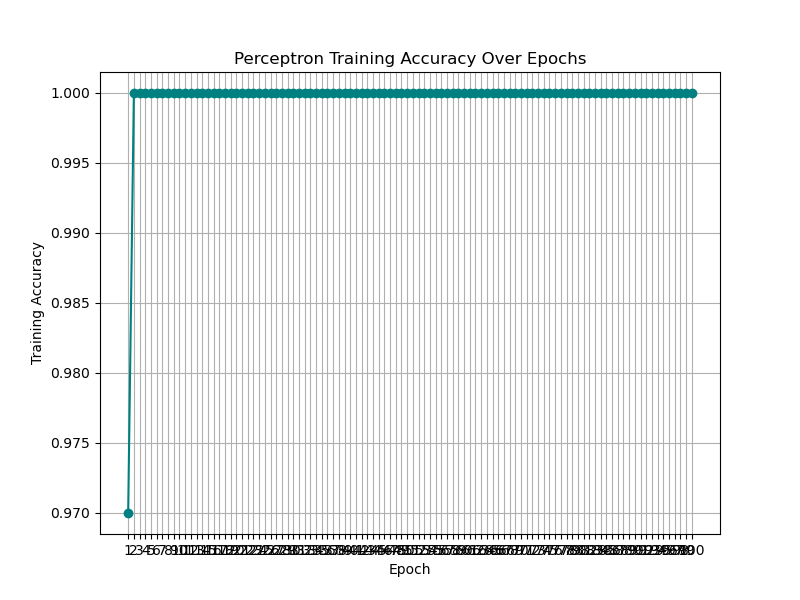

In [4]:
# --- Plot Accuracy over Epochs ---

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, marker='o', color='teal', linestyle='-') # Nice color, epochs start from 1
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.title("Perceptron Training Accuracy Over Epochs")

plt.xticks(np.arange(1, len(accuracy_history)+1, 1.0)) # More appropriate for epochs
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


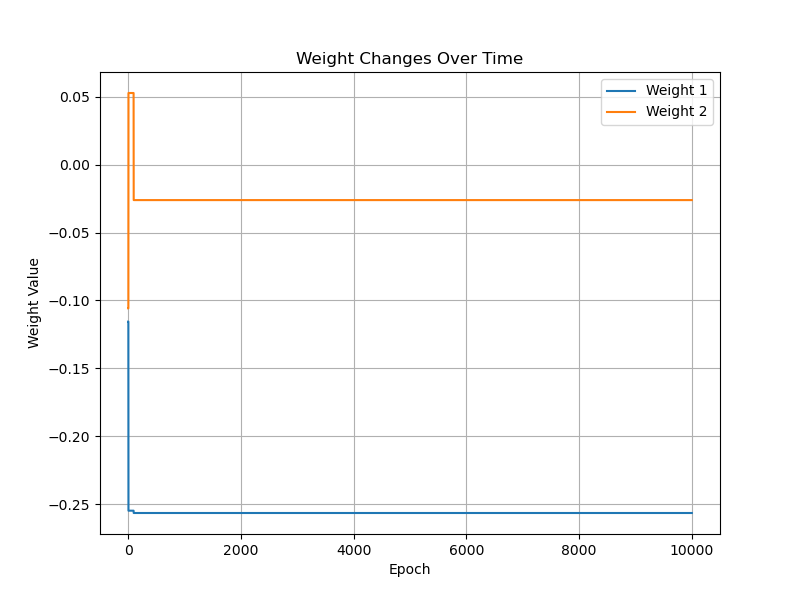

In [5]:
# --- Plot Weight Changes over Epochs ---
plt.figure(figsize=(8, 6))
for i in range(weight_history.shape[1]):
    plt.plot(range(1, len(weight_history) + 1), weight_history[:, i], label=f"Weight {i+1}") # Label each weight
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title("Weight Changes Over Time")
plt.legend()  # Show labels
plt.grid(True)
plt.show()


plt.show()